In [ ]:
pip install gurobipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 50.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from gurobipy import Model, GRB, quicksum

In [ ]:
rnd = np.random
rnd.seed(0)

In [ ]:
n = 20  # number of clients
xc = rnd.rand(n+1)*200
yc = rnd.rand(n+1)*100

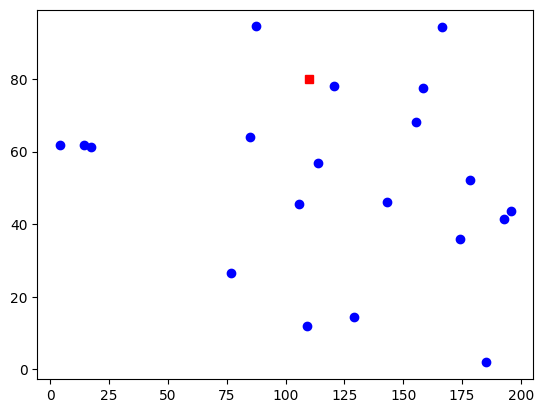

In [ ]:
plt.plot(xc[0], yc[0], c='r', marker='s')
plt.scatter(xc[1:], yc[1:], c='b')

In [ ]:
N = [i for i in range(1, n+1)]
V = [0] + N
A = [(i, j) for i in V for j in V if i != j]
c = {(i, j): np.hypot(xc[i]-xc[j], yc[i]-yc[j]) for i, j in A}
Q = 20
q = {i: rnd.randint(1, 10) for i in N}

In [ ]:
model = Model('CVRP')

In [ ]:
x = model.addVars(A, vtype=GRB.BINARY)
u = model.addVars(N, vtype=GRB.CONTINUOUS)

In [ ]:
model.modelSense = GRB.MINIMIZE
model.setObjective(quicksum(x[i, j]*c[i, j] for i, j in A))

In [ ]:
model.addConstrs(quicksum(x[i, j] for j in V if j != i) == 1 for i in N)
model.addConstrs(quicksum(x[i, j] for i in V if i != j) == 1 for j in N)
model.addConstrs((x[i, j] == 1) >> (u[i]+q[j] == u[j])
               for i, j in A if i != 0 and j != 0)
model.addConstrs(u[i] >= q[i] for i in N)
model.addConstrs(u[i] <= Q for i in N)

{1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>,
 11: <gurobi.Constr *Awaiting Model Update*>,
 12: <gurobi.Constr *Awaiting Model Update*>,
 13: <gurobi.Constr *Awaiting Model Update*>,
 14: <gurobi.Constr *Awaiting Model Update*>,
 15: <gurobi.Constr *Awaiting Model Update*>,
 16: <gurobi.Constr *Awaiting Model Update*>,
 17: <gurobi.Constr *Awaiting Model Update*>,
 18: <gurobi.Constr *Awaiting Model Update*>,
 19: <gurobi.Constr *Awaiting Model Update*>,
 20: <gurobi.Constr *Awaiting Model Update*>}

In [ ]:
model.Params.MIPGap = 0.1
model.Params.TimeLimit = 30  # seconds
model.optimize()

Set parameter MIPGap to value 0.1
Set parameter TimeLimit to value 30
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 80 rows, 440 columns and 840 nonzeros
Model fingerprint: 0x354a6feb
Model has 380 general constraints
Variable types: 20 continuous, 420 integer (420 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+00, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
  GenCon rhs range [1e+00, 9e+00]
  GenCon coe range [1e+00, 1e+00]
Presolve added 734 rows and 102 columns
Presolve time: 0.06s
Presolved: 814 rows, 542 columns, 5618 nonzeros
Variable types: 122 continuous, 420 integer (420 binary)
Found heuristic solution: objective 2540.4720602

Root relaxation: objective 4.516618e+02, 76 iterations, 0.00 seconds (0.00 work units)

    No

In [ ]:
model.objVal

926.6848169793905

In [ ]:
model.getConstrs()

<bound method Model.getConstrs of <gurobi.Model MIP instance CVRP: 80 constrs, 440 vars, Parameter changes: TimeLimit=30.0, MIPGap=0.1>>

In [ ]:
for v in model.getVars():
    print(f"{v.VarName} = {v.X}")

C0 = 1.0
C1 = 1.0
C2 = -0.0
C3 = 1.0
C4 = -0.0
C5 = -0.0
C6 = 1.0
C7 = 0.0
C8 = -0.0
C9 = -0.0
C10 = -0.0
C11 = -0.0
C12 = -0.0
C13 = -0.0
C14 = 1.0
C15 = 0.0
C16 = 1.0
C17 = -0.0
C18 = -0.0
C19 = -0.0
C20 = -0.0
C21 = 0.0
C22 = 0.0
C23 = 0.0
C24 = 1.0
C25 = 0.0
C26 = 0.0
C27 = 0.0
C28 = 0.0
C29 = 0.0
C30 = 0.0
C31 = 0.0
C32 = 0.0
C33 = 0.0
C34 = 0.0
C35 = 0.0
C36 = 0.0
C37 = 0.0
C38 = 0.0
C39 = 0.0
C40 = 1.0
C41 = 0.0
C42 = 0.0
C43 = 0.0
C44 = 0.0
C45 = 0.0
C46 = 0.0
C47 = 0.0
C48 = 0.0
C49 = 0.0
C50 = 0.0
C51 = 0.0
C52 = 0.0
C53 = 0.0
C54 = 0.0
C55 = 0.0
C56 = 0.0
C57 = 0.0
C58 = 0.0
C59 = 0.0
C60 = -0.0
C61 = 0.0
C62 = 0.0
C63 = 0.0
C64 = 0.0
C65 = 0.0
C66 = 0.0
C67 = 0.0
C68 = 1.0
C69 = 0.0
C70 = 0.0
C71 = 0.0
C72 = 0.0
C73 = 0.0
C74 = 0.0
C75 = 0.0
C76 = 0.0
C77 = 0.0
C78 = 0.0
C79 = 0.0
C80 = -0.0
C81 = 0.0
C82 = 0.0
C83 = 0.0
C84 = 0.0
C85 = 0.0
C86 = 0.0
C87 = 0.0
C88 = 0.0
C89 = 0.0
C90 = 1.0
C91 = 0.0
C92 = 0.0
C93 = 0.0
C94 = 0.0
C95 = 0.0
C96 = 0.0
C97 = 0.0
C98 = 0.0
C99 =

In [ ]:
active_arcs = [a for a in A if x[a].x > 0.99]

In [ ]:
active_arcs

[(0, 1),
 (0, 2),
 (0, 4),
 (0, 7),
 (0, 15),
 (0, 17),
 (1, 5),
 (2, 0),
 (3, 9),
 (4, 11),
 (5, 3),
 (6, 0),
 (7, 20),
 (8, 13),
 (9, 0),
 (10, 18),
 (11, 12),
 (12, 0),
 (13, 19),
 (14, 16),
 (15, 14),
 (16, 6),
 (17, 10),
 (18, 0),
 (19, 0),
 (20, 8)]

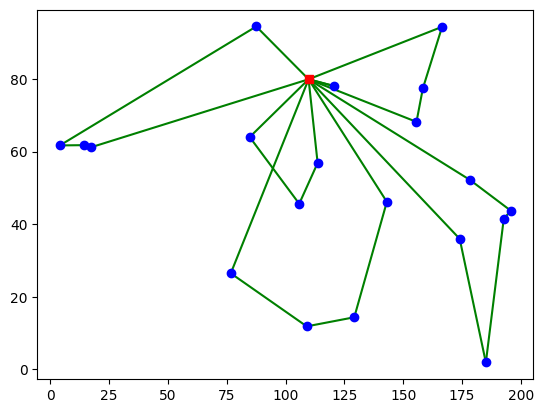

In [ ]:
for i, j in active_arcs:
    plt.plot([xc[i], xc[j]], [yc[i], yc[j]], c='g', zorder=0)
plt.plot(xc[0], yc[0], c='r', marker='s')
plt.scatter(xc[1:], yc[1:], c='b')